Universidad del Valle de Guatemala
##Mineria de Datos
Martin Amado 19020
Laura Tamath 19365
Juan Pablo Pineda 19087

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [3]:
DF = pd.read_csv("movies.csv", encoding="latin1")
DF.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [4]:
xScale = []
for column in DF.columns:
    try:
        column
        DF[column] = (DF[column]-DF[column].mean())/DF[column].std()
        if column == "id" or column == "productionCoAmount" or column == "productionCountriesAmount" or column == "genresAmount":
            continue
        xScale.append(DF[column])
    except:
        continue

In [11]:
normDF = DF.dropna(subset=['budget', 'revenue', 'runtime', 'video', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount'], inplace=True)
X = np.array(DF[['budget', 'revenue', 'runtime', 'video', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount']])

Variables que no aportan información:
    id porque es numerica secuencial y no provee información útil.
    original_title, originalLanguage, title, homePage, video, director, genres, productionCompany, productionCompanyCountry, productionCountry, releaseDate, actors, actorsCharacter porque estas variables que expresan una cualidad, característica y/o modalidad. 
    productionCoAmount, productionCountriesAmount, genresAmount porque no son variables que aportan información valiosa, únicamente desmuestran cantidades.
    
    
Que si: (BORRAR)
    budget
    revenue
    actorsPopularity
    popularity
    voteAvg
    voteCount
    actorsAmount
    castWomenAmount
    castMenAmount

Pre Processing

In [12]:
X_Scale = sklearn.preprocessing.scale(X)

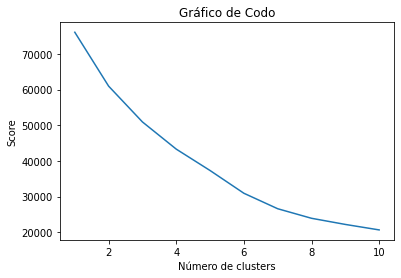

In [15]:
numeroClusters = range(1,11)
wcss = []
for k in numeroClusters:
    try:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X_Scale)
        wcss.append(kmeanModel.inertia_)
    except:
        continue
plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

2. Interprete  los  grupos  basado  en  el  conocimiento  que  tiene  de  los  datos.  Recuerde  investigar  las  medidas de tendencia central de las variables continuas y 
las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.

3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

4. Utilice 3 algoritmos existentes para agrupamiento. Compare los resultados generados por cada uno. 

5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

6. Interprete  los  grupos  basado  en  el  conocimiento  que  tiene  de  los  datos.  Recuerde  investigar  las medidas de tendencia central de las variables continuas y 
las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.